#### Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import plotly.express as px

#### Data Loading

In [ ]:
# actual data
actual = pd.read_csv('Jobs/Evaluation/data/actual/price.csv')

# predicted data
predicted = pd.read_csv('Jobs/Inferencing/data/predictions/pred_df.csv')

In [10]:
# merge data
data = pd.merge(actual, predicted, on='datetime_', how='inner')

In [14]:
data.dropna(inplace=True)

In [20]:
data['datetime_'] = pd.to_datetime(data['datetime_'])

In [15]:
data.shape

(48, 4)

In [21]:
data.head()

,Unnamed: 0,datetime_,actual_pool_price,predicted_pool_price
7,73,2025-03-22 01:00:00,29.45,43.652534
8,74,2025-03-22 02:00:00,32.93,45.241932
9,75,2025-03-22 03:00:00,31.68,45.208706
10,76,2025-03-22 04:00:00,36.57,45.171886
11,77,2025-03-22 05:00:00,58.45,48.068280


#### Metrics

In [34]:
# Extract actual and predicted values
y_true = data['actual_pool_price']
y_pred = data['predicted_pool_price']

# Compute metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mse ** 0.5
mape = (abs(y_true - y_pred) / y_true).mean() * 100  # MAPE in %
r2 = r2_score(y_true, y_pred)

# Print results
print(f"Regression Metrics")
print(f"---------------------------")
print(f"Mean Absolute Error (MAE)  : {mae:.4f}")
print(f"Mean Squared Error (MSE)   : {mse:.4f}")
print(f"Root Mean Squared Error    : {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE) : {mape:.2f}%")
print(f"R² Score                   : {r2:.4f}")


Regression Metrics
---------------------------
Mean Absolute Error (MAE)  : 17.2834
Mean Squared Error (MSE)   : 643.1018
Root Mean Squared Error    : 25.3595
Mean Absolute Percentage Error (MAPE) : 92.99%
R² Score                   : 0.2076


#### Plot

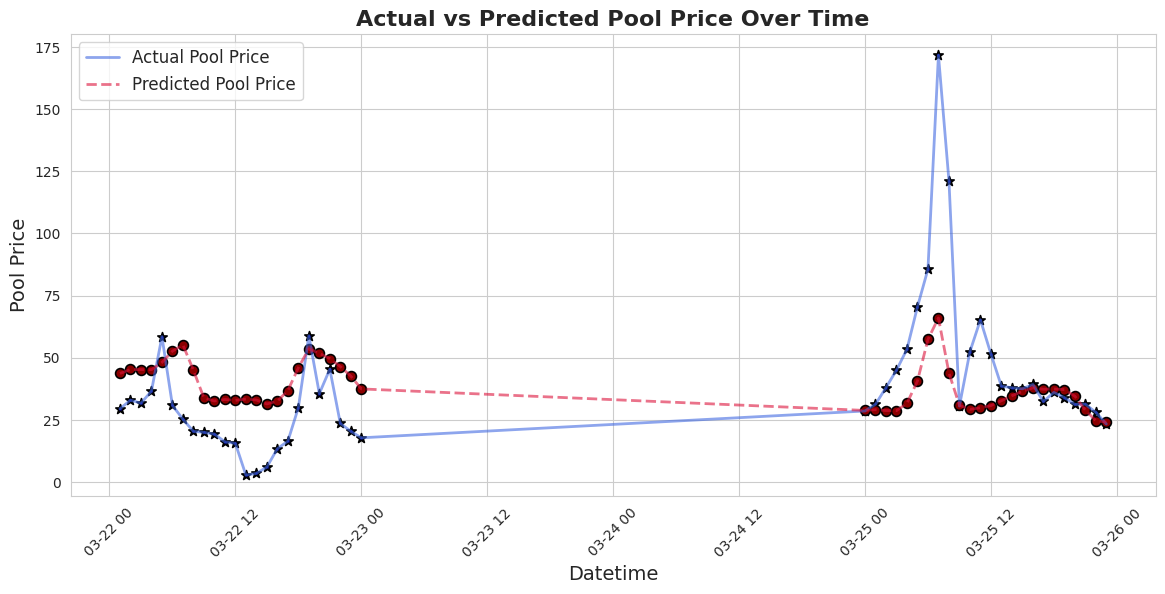

In [31]:
# Convert datetime column (if not already in datetime format)
data['datetime_'] = pd.to_datetime(data['datetime_'])

# Set style
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(14, 6))

# Plot actual pool price (lighter line)
sns.lineplot(x='datetime_', y='actual_pool_price', data=data, label="Actual Pool Price", color='royalblue', linewidth=2, alpha=0.6)
# Darker markers for actual price
sns.scatterplot(x='datetime_', y='actual_pool_price', data=data, color='navy', marker='*', s=50, edgecolor='black', linewidth=1.2)

# Plot predicted pool price (lighter dashed line)
sns.lineplot(x='datetime_', y='predicted_pool_price', data=data, label="Predicted Pool Price", color='crimson', linestyle='dashed', linewidth=2, alpha=0.6)
# Darker markers for predicted price
sns.scatterplot(x='datetime_', y='predicted_pool_price', data=data, color='darkred', marker='o', s=50, edgecolor='black', linewidth=1.2)

# Improve readability
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.xlabel("Datetime", fontsize=14)  
plt.ylabel("Pool Price", fontsize=14)  
plt.title("Actual vs Predicted Pool Price Over Time", fontsize=16, fontweight='bold')  

# Add legend
plt.legend(fontsize=12)

# Display the plot
plt.show()


In [ ]:
# Create an interactive line plot using Plotly
fig = px.line(data, x='datetime_', y=['actual_pool_price', 'predicted_pool_price'],
              labels={'value': 'Pool Price', 'datetime_': 'Datetime'},
              title="Actual vs Predicted Pool Price Over Time",
              color_discrete_map={'actual_pool_price': 'royalblue', 'predicted_pool_price': 'crimson'})

# Update layout for better readability
fig.update_layout(
    xaxis_title="Datetime",
    yaxis_title="Pool Price",
    legend_title="Legend",
    template="plotly_white",
    title_font=dict(size=20, family='Arial', color='black')
)

# Save the interactive plot as an HTML file
html_file_path = "Jobs/Evaluation/webpage/actual_vs_predicted_pool_price.html"
fig.write_html(html_file_path)

# Append metrics to the HTML file
metrics_html = f"""
<h2>Regression Metrics</h2>
<ul>
    <li><strong>Mean Absolute Error (MAE):</strong> {mae:.4f}</li>
    <li><strong>Mean Squared Error (MSE):</strong> {mse:.4f}</li>
    <li><strong>Root Mean Squared Error (RMSE):</strong> {rmse:.4f}</li>
    <li><strong>Mean Absolute Percentage Error (MAPE):</strong> {mape:.2f}%</li>
    <li><strong>R² Score:</strong> {r2:.4f}</li>
</ul>
"""

with open(html_file_path, "a") as f:
    f.write(metrics_html)

# Display a message
print("Interactive graph and metrics saved as 'actual_vs_predicted_pool_price.html'")

Interactive graph and metrics saved as 'actual_vs_predicted_pool_price.html'


In [ ]:
# Create an interactive line plot using Plotly
fig = px.line(data, x='datetime_', y=['actual_pool_price', 'predicted_pool_price'],
              labels={'value': 'Pool Price', 'datetime_': 'Datetime'},
              title="Actual vs Predicted Pool Price Over Time",
              color_discrete_map={'actual_pool_price': 'royalblue', 'predicted_pool_price': 'crimson'})

# Update layout for better readability
fig.update_layout(
    xaxis_title="Datetime",
    yaxis_title="Pool Price",
    legend_title="Legend",
    template="plotly_white",
    title_font=dict(size=20, family='Arial', color='black')
)

# Save the interactive plot as an HTML file
fig.write_html("Jobs/Evaluation/webpage/actual_vs_predicted_pool_price.html")

# Display a message
print("Interactive graph saved as 'actual_vs_predicted_pool_price.html'")

Interactive graph saved as 'actual_vs_predicted_pool_price.html'
